<a href="https://colab.research.google.com/github/ArthAgrawal/Brain-Tumor-Research-Paper/blob/main/Atrous_MobileNetV3(Small_and_Large)_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Re-Training MobileNetv2 to see if similar accuracy is achieved

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import os
import pandas as pd

dataset_folder_path = '/content/drive/MyDrive/Brain_Tumor_Albumented_Balanced_Final2'

img_height, img_width = 224, 224  # Size required by VGG16
batch_size = 32

def get_image_paths_and_labels(base_path):
    labels = []
    paths = []
    class_names = sorted(os.listdir(base_path))

    for label, class_name in enumerate(class_names):
        class_folder = os.path.join(base_path, class_name)
        for img_name in os.listdir(class_folder):
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(class_folder, img_name)
                paths.append(img_path)
                labels.append(label)

    return paths, labels, class_names

image_paths, labels, class_names = get_image_paths_and_labels(dataset_folder_path)

labels = np.array(labels)

X_train_val, X_test, y_train_val, y_test = train_test_split(
    image_paths, labels, test_size=0.2, stratify=labels, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=42)

train_df = pd.DataFrame({'filename': X_train, 'class': y_train})
val_df = pd.DataFrame({'filename': X_val, 'class': y_val})
test_df = pd.DataFrame({'filename': X_test, 'class': y_test})

train_df['class'] = train_df['class'].apply(lambda x: class_names[x])
val_df['class'] = val_df['class'].apply(lambda x: class_names[x])
test_df['class'] = test_df['class'].apply(lambda x: class_names[x])

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='class',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filename',
    y_col='class',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filename',
    y_col='class',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

print(f"Class names: {class_names}")


Found 3840 validated image filenames belonging to 15 classes.
Found 960 validated image filenames belonging to 15 classes.
Found 1200 validated image filenames belonging to 15 classes.
Class names: ['Astrocitoma T1_augmented', 'Carcinoma T1_augmented', 'Ependimoma T1_augmented', 'Ganglioglioma T1_augmented', 'Germinoma T1_augmented', 'Glioblastoma T1_augmented', 'Granuloma T1_augmented', 'Meduloblastoma T1_augmented', 'Meningioma T1_augmented', 'Neurocitoma T1_augmented', 'Oligodendroglioma T1_augmented', 'Papiloma T1_augmented', 'Schwannoma T1_augmented', 'Tuberculoma T1_augmented', '_NORMAL T1_augmented']


In [5]:
from collections import Counter

def check_split_distribution(labels):
    return Counter(labels)

train_dist = check_split_distribution(y_train)
val_dist = check_split_distribution(y_val)
test_dist = check_split_distribution(y_test)

print("Class distribution in the training set:")
for class_index, count in train_dist.items():
    print(f"Class {class_index}: {count} images")

print("\nClass distribution in the validation set:")
for class_index, count in val_dist.items():
    print(f"Class {class_index}: {count} images")

print("\nClass distribution in the test set:")
for class_index, count in test_dist.items():
    print(f"Class {class_index}: {count} images")


Class distribution in the training set:
Class 3: 256 images
Class 9: 256 images
Class 13: 256 images
Class 1: 256 images
Class 10: 256 images
Class 8: 256 images
Class 11: 256 images
Class 12: 256 images
Class 2: 256 images
Class 4: 256 images
Class 0: 256 images
Class 14: 256 images
Class 7: 256 images
Class 5: 256 images
Class 6: 256 images

Class distribution in the validation set:
Class 9: 64 images
Class 13: 64 images
Class 4: 64 images
Class 11: 64 images
Class 2: 64 images
Class 14: 64 images
Class 6: 64 images
Class 5: 64 images
Class 10: 64 images
Class 3: 64 images
Class 8: 64 images
Class 7: 64 images
Class 12: 64 images
Class 0: 64 images
Class 1: 64 images

Class distribution in the test set:
Class 1: 80 images
Class 10: 80 images
Class 6: 80 images
Class 9: 80 images
Class 11: 80 images
Class 2: 80 images
Class 12: 80 images
Class 3: 80 images
Class 13: 80 images
Class 8: 80 images
Class 5: 80 images
Class 4: 80 images
Class 14: 80 images
Class 7: 80 images
Class 0: 80 im

In [6]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Oct  9 11:39:18 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [7]:
import tensorflow as tf
if tf.config.list_physical_devices('GPU'):
    print("GPU is available")
else:
    print("GPU is not available")

GPU is available


In [8]:
import time
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Conv2D, DepthwiseConv2D, MaxPooling2D, Input, Dropout, concatenate, add, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

# Best hyperparameters found
best_layers = [512, 256, 128]
best_batch_size = 64
best_learning_rate = 0.001

def atrous_bottleneck_block(x, filters, dilation_rate):
    shortcut = x  # Skip connection

    # First layer
    x = Conv2D(filters // 4, (1, 1), padding='same', activation='relu')(x)

    # Atrous convolution (depthwise separable convolution for MobileNet style)
    x = DepthwiseConv2D((3, 3), dilation_rate=dilation_rate, padding='same', activation='relu')(x)
    x = Conv2D(filters // 4, (1, 1), padding='same', activation='relu')(x)

    # Third layer
    x = Conv2D(filters, (1, 1), padding='same', activation='relu')(x)

    # Adjust the shortcut to match the shape of x (if necessary)
    if shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), padding='same', activation='relu')(shortcut)

    # Add skip connection
    x = add([shortcut, x])
    return x

def create_mobilenetv2_with_atrous_and_aspp():
    input_layer = Input(shape=(224, 224, 3))

    # Load MobileNetV2 without the top layers
    base_model = MobileNetV2(input_tensor=input_layer, include_top=False, weights='imagenet')

    # Add custom atrous bottleneck and ASPP on top of MobileNetV2 feature extractor
    x = base_model.output

    # Atrous Bottleneck Block
    x = atrous_bottleneck_block(x, 256, dilation_rate=(2, 2))

    # ASPP block
    atrous_1 = DepthwiseConv2D((3, 3), dilation_rate=(1, 1), padding='same', activation='relu')(x)
    atrous_1 = Conv2D(256, (1, 1), padding='same', activation='relu')(atrous_1)

    atrous_2 = DepthwiseConv2D((3, 3), dilation_rate=(2, 2), padding='same', activation='relu')(x)
    atrous_2 = Conv2D(256, (1, 1), padding='same', activation='relu')(atrous_2)

    atrous_3 = DepthwiseConv2D((3, 3), dilation_rate=(3, 3), padding='same', activation='relu')(x)
    atrous_3 = Conv2D(256, (1, 1), padding='same', activation='relu')(atrous_3)

    atrous_4 = DepthwiseConv2D((3, 3), dilation_rate=(4, 4), padding='same', activation='relu')(x)
    atrous_4 = Conv2D(256, (1, 1), padding='same', activation='relu')(atrous_4)

    # Concatenate ASPP outputs
    x = concatenate([atrous_1, atrous_2, atrous_3, atrous_4])

    # Final pooling
    x = GlobalAveragePooling2D()(x)

    # Fully connected layers
    for nodes in best_layers:
        x = Dense(nodes, activation='relu')(x)
        x = BatchNormalization()(x)

    # Output layer for classification
    predictions = Dense(15, activation='softmax')(x)

    model4 = Model(inputs=input_layer, outputs=predictions)

    # Compile the model
    model4.compile(optimizer=Adam(learning_rate=best_learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model4

model4 = create_mobilenetv2_with_atrous_and_aspp()

model4.summary()

early_stopping = EarlyStopping(monitor='val_accuracy', patience=9, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Start time
start_time = time.time()

# Train the model
history = model4.fit(
    train_generator,
    validation_data=val_generator,
    epochs=40,
    batch_size=best_batch_size,
    callbacks=[early_stopping, reduce_lr]
)

# End time
end_time = time.time()
training_time = end_time - start_time

print(f"Training Time: {training_time:.2f} seconds")

# Print final training and validation accuracies
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")


<ipython-input-8-aa32f9eded0a>:38: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_tensor=input_layer, include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 3,657,295 (13.95 MB)

 Trainable params: 3,621,391 (13.81 MB)

 Non-trainable params: 35,904 (140.25 KB)

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


120/120 ━━━━━━━━━━━━━━━━━━━━ 3284s 26s/step - accuracy: 0.4491 - loss: 1.8925 - val_accuracy: 0.0781 - val_loss: 2.7325 - learning_rate: 0.0010
Epoch 2/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 18s 144ms/step - accuracy: 0.7675 - loss: 0.7728 - val_accuracy: 0.1208 - val_loss: 2.7355 - learning_rate: 0.0010
Epoch 3/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 18s 139ms/step - accuracy: 0.8192 - loss: 0.5813 - val_accuracy: 0.1594 - val_loss: 3.9292 - learning_rate: 0.0010
Epoch 4/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 18s 140ms/step - accuracy: 0.8564 - loss: 0.4917 - val_accuracy: 0.2062 - val_loss: 4.0294 - learning_rate: 0.0010
Epoch 5/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 17s 137ms/step - accuracy: 0.9032 - loss: 0.3226 - val_accuracy: 0.2438 - val_loss: 3.4503 - learning_rate: 5.0000e-04
Epoch 6/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 17s 137ms/step - accuracy: 0.9617 - loss: 0.1219 - val_accuracy: 0.2750 - val_loss: 3.4446 - learning_rate: 5.0000e-04
Epoch 7/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 18s 140ms/step - accuracy: 0.9678

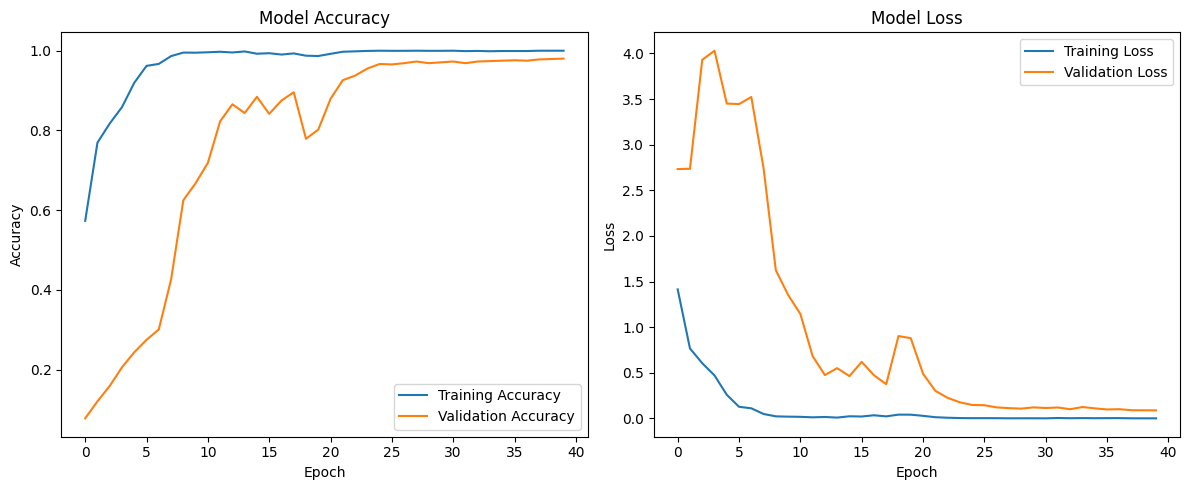

In [9]:
 import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [10]:
test_loss, test_acc = model4.evaluate(test_generator)

print(f"Test Accuracy: {test_acc:.4f}")


38/38 ━━━━━━━━━━━━━━━━━━━━ 790s 21s/step - accuracy: 0.9724 - loss: 0.0962
Test Accuracy: 0.9683


Exactly same accuracy was achieved

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict on the test set using the trained model
y_pred_probs = model4.predict(test_generator, verbose=1)

# Get the class with the highest probability (convert probabilities to class labels)
y_pred = np.argmax(y_pred_probs, axis=1)

# Get the true labels from the test generator
y_true = test_generator.classes

# Print the classification report, which includes precision, recall, and F1-score for each class
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Optional: Print the confusion matrix to further analyze the predictions
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step
                                precision    recall  f1-score   support

      Astrocitoma T1_augmented       0.97      0.93      0.95        80
        Carcinoma T1_augmented       0.99      0.97      0.98        80
       Ependimoma T1_augmented       0.99      0.99      0.99        80
    Ganglioglioma T1_augmented       0.99      1.00      0.99        80
        Germinoma T1_augmented       0.96      0.94      0.95        80
     Glioblastoma T1_augmented       1.00      0.99      0.99        80
        Granuloma T1_augmented       0.96      0.96      0.96        80
   Meduloblastoma T1_augmented       0.99      1.00      0.99        80
       Meningioma T1_augmented       0.88      0.86      0.87        80
      Neurocitoma T1_augmented       0.92      0.96      0.94        80
Oligodendroglioma T1_augmented       0.96      0.99      0.98        80
         Papiloma T1_augmented       0.99      0.96      0.97        80
       Schwannoma T1_

In [12]:
import time
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Conv2D, DepthwiseConv2D, MaxPooling2D, Input, Dropout, concatenate, add, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.optimizers import Adam

# Best hyperparameters found
best_layers = [512, 256, 128]
best_batch_size = 64
best_learning_rate = 0.001

def atrous_bottleneck_block(x, filters, dilation_rate):
    shortcut = x  # Skip connection

    # First layer
    x = Conv2D(filters // 4, (1, 1), padding='same', activation='relu')(x)

    # Atrous convolution (depthwise separable convolution for MobileNet style)
    x = DepthwiseConv2D((3, 3), dilation_rate=dilation_rate, padding='same', activation='relu')(x)
    x = Conv2D(filters // 4, (1, 1), padding='same', activation='relu')(x)

    # Third layer
    x = Conv2D(filters, (1, 1), padding='same', activation='relu')(x)

    # Adjust the shortcut to match the shape of x (if necessary)
    if shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), padding='same', activation='relu')(shortcut)

    # Add skip connection
    x = add([shortcut, x])
    return x

def create_mobilenetv3_small_with_atrous_and_aspp():
    input_layer = Input(shape=(224, 224, 3))

    # Load MobileNetV3Small without the top layers
    base_model = MobileNetV3Small(input_tensor=input_layer, include_top=False, weights='imagenet')

    # Add custom atrous bottleneck and ASPP on top of MobileNetV3Small feature extractor
    x = base_model.output

    # Atrous Bottleneck Block
    x = atrous_bottleneck_block(x, 256, dilation_rate=(2, 2))

    # ASPP block
    atrous_1 = DepthwiseConv2D((3, 3), dilation_rate=(1, 1), padding='same', activation='relu')(x)
    atrous_1 = Conv2D(256, (1, 1), padding='same', activation='relu')(atrous_1)

    atrous_2 = DepthwiseConv2D((3, 3), dilation_rate=(2, 2), padding='same', activation='relu')(x)
    atrous_2 = Conv2D(256, (1, 1), padding='same', activation='relu')(atrous_2)

    atrous_3 = DepthwiseConv2D((3, 3), dilation_rate=(3, 3), padding='same', activation='relu')(x)
    atrous_3 = Conv2D(256, (1, 1), padding='same', activation='relu')(atrous_3)

    atrous_4 = DepthwiseConv2D((3, 3), dilation_rate=(4, 4), padding='same', activation='relu')(x)
    atrous_4 = Conv2D(256, (1, 1), padding='same', activation='relu')(atrous_4)

    # Concatenate ASPP outputs
    x = concatenate([atrous_1, atrous_2, atrous_3, atrous_4])

    # Final pooling
    x = GlobalAveragePooling2D()(x)

    # Fully connected layers
    for nodes in best_layers:
        x = Dense(nodes, activation='relu')(x)
        x = BatchNormalization()(x)

    # Output layer for classification
    predictions = Dense(15, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=predictions)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=best_learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

model = create_mobilenetv3_small_with_atrous_and_aspp()

model.summary()

early_stopping = EarlyStopping(monitor='val_accuracy', patience=9, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Start time
start_time = time.time()

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=40,
    batch_size=best_batch_size,
    callbacks=[early_stopping, reduce_lr]
)

# End time
end_time = time.time()
training_time = end_time - start_time

print(f"Training Time: {training_time:.2f} seconds")

# Print final training and validation accuracies
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")


4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv (Conv2D)             │ (None, 112, 112, 16)   │            432 │ rescaling[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_bn                   │ (None, 112, 112, 16)   │             64 │ conv[0][0]             │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 112, 112, 16)   │              0 │ conv_bn[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 113, 113, 16)   │              0 │ activation[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 56, 56, 16)     │            144 │ expanded_conv_depthwi… │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 56, 56, 16)     │             64 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 56, 56, 16)     │              0 │ expanded_conv_depthwi… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 16)       │              0 │ re_lu[0][0]            │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 8)        │            136 │ expanded_conv_squeeze… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 8)        │              0 │ expanded_conv_squeeze… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 16)       │            144 │ expanded_conv_squeeze… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 1, 1, 16)       │              0 │ expanded_conv_squeeze… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 1, 1, 16)       │              0 │ add_1[0][0]            │
├──────────────────────

 Total params: 2,113,151 (8.06 MB)

 Trainable params: 2,099,247 (8.01 MB)

 Non-trainable params: 13,904 (54.31 KB)

Epoch 1/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 71s 176ms/step - accuracy: 0.4294 - loss: 1.9394 - val_accuracy: 0.0667 - val_loss: 2.7894 - learning_rate: 0.0010
Epoch 2/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 17s 136ms/step - accuracy: 0.7870 - loss: 0.7217 - val_accuracy: 0.0667 - val_loss: 2.8841 - learning_rate: 0.0010
Epoch 3/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 17s 136ms/step - accuracy: 0.8291 - loss: 0.5554 - val_accuracy: 0.0667 - val_loss: 2.8705 - learning_rate: 0.0010
Epoch 4/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 17s 136ms/step - accuracy: 0.8663 - loss: 0.4247 - val_accuracy: 0.0667 - val_loss: 2.9121 - learning_rate: 0.0010
Epoch 5/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.8957 - loss: 0.3252 - val_accuracy: 0.0729 - val_loss: 2.9454 - learning_rate: 5.0000e-04
Epoch 6/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 17s 137ms/step - accuracy: 0.9269 - loss: 0.2305 - val_accuracy: 0.0667 - val_loss: 3.2013 - learning_rate: 5.0000e-04
Epoch 7/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 17s 136ms/step - accur

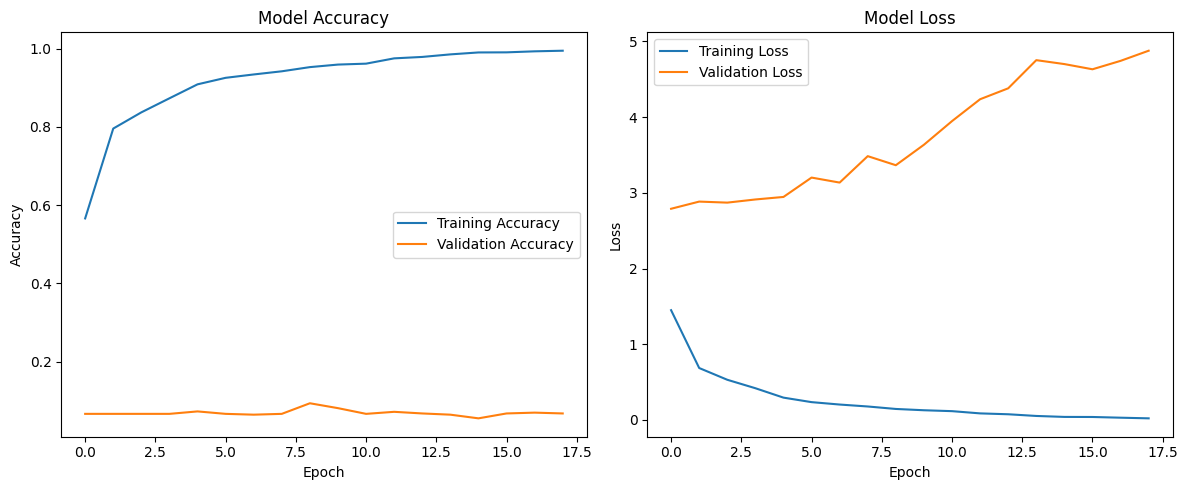

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [14]:
test_loss, test_acc = model.evaluate(test_generator)

print(f"Test Accuracy: {test_acc:.4f}")


38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 220ms/step - accuracy: 0.0804 - loss: 3.3980
Test Accuracy: 0.0942


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict on the test set using the trained model
y_pred_probs = model.predict(test_generator, verbose=1)

# Get the class with the highest probability (convert probabilities to class labels)
y_pred = np.argmax(y_pred_probs, axis=1)

# Get the true labels from the test generator
y_true = test_generator.classes

# Print the classification report, which includes precision, recall, and F1-score for each class
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Optional: Print the confusion matrix to further analyze the predictions
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 229ms/step
                                precision    recall  f1-score   support

      Astrocitoma T1_augmented       0.00      0.00      0.00        80
        Carcinoma T1_augmented       0.00      0.00      0.00        80
       Ependimoma T1_augmented       0.00      0.00      0.00        80
    Ganglioglioma T1_augmented       0.07      0.74      0.13        80
        Germinoma T1_augmented       0.00      0.00      0.00        80
     Glioblastoma T1_augmented       0.00      0.00      0.00        80
        Granuloma T1_augmented       0.00      0.00      0.00        80
   Meduloblastoma T1_augmented       0.00      0.00      0.00        80
       Meningioma T1_augmented       0.00      0.00      0.00        80
      Neurocitoma T1_augmented       0.00      0.00      0.00        80
Oligodendroglioma T1_augmented       0.00      0.00      0.00        80
         Papiloma T1_augmented       0.00      0.00      0.00        80
       Schwannoma T1_

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
import time
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Conv2D, DepthwiseConv2D, MaxPooling2D, Input, Dropout, concatenate, add, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.optimizers import Adam

# Best hyperparameters found
best_layers = [512, 256, 128]
best_batch_size = 64
best_learning_rate = 0.001

def atrous_bottleneck_block(x, filters, dilation_rate):
    shortcut = x  # Skip connection

    # First layer
    x = Conv2D(filters // 4, (1, 1), padding='same', activation='relu')(x)

    # Atrous convolution (depthwise separable convolution for MobileNet style)
    x = DepthwiseConv2D((3, 3), dilation_rate=dilation_rate, padding='same', activation='relu')(x)
    x = Conv2D(filters // 4, (1, 1), padding='same', activation='relu')(x)

    # Third layer
    x = Conv2D(filters, (1, 1), padding='same', activation='relu')(x)

    # Adjust the shortcut to match the shape of x (if necessary)
    if shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), padding='same', activation='relu')(shortcut)

    # Add skip connection
    x = add([shortcut, x])
    return x

def create_mobilenetv3_small_with_atrous_and_aspp():
    input_layer = Input(shape=(224, 224, 3))

    # Load MobileNetV3Small without the top layers
    base_model = MobileNetV3Large(input_tensor=input_layer, include_top=False, weights='imagenet')

    # Add custom atrous bottleneck and ASPP on top of MobileNetV3Small feature extractor
    x = base_model.output

    # Atrous Bottleneck Block
    x = atrous_bottleneck_block(x, 256, dilation_rate=(2, 2))

    # ASPP block
    atrous_1 = DepthwiseConv2D((3, 3), dilation_rate=(1, 1), padding='same', activation='relu')(x)
    atrous_1 = Conv2D(256, (1, 1), padding='same', activation='relu')(atrous_1)

    atrous_2 = DepthwiseConv2D((3, 3), dilation_rate=(2, 2), padding='same', activation='relu')(x)
    atrous_2 = Conv2D(256, (1, 1), padding='same', activation='relu')(atrous_2)

    atrous_3 = DepthwiseConv2D((3, 3), dilation_rate=(3, 3), padding='same', activation='relu')(x)
    atrous_3 = Conv2D(256, (1, 1), padding='same', activation='relu')(atrous_3)

    atrous_4 = DepthwiseConv2D((3, 3), dilation_rate=(4, 4), padding='same', activation='relu')(x)
    atrous_4 = Conv2D(256, (1, 1), padding='same', activation='relu')(atrous_4)

    # Concatenate ASPP outputs
    x = concatenate([atrous_1, atrous_2, atrous_3, atrous_4])

    # Final pooling
    x = GlobalAveragePooling2D()(x)

    # Fully connected layers
    for nodes in best_layers:
        x = Dense(nodes, activation='relu')(x)
        x = BatchNormalization()(x)

    # Output layer for classification
    predictions = Dense(15, activation='softmax')(x)

    model2 = Model(inputs=input_layer, outputs=predictions)

    # Compile the model
    model2.compile(optimizer=Adam(learning_rate=best_learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model2

model2 = create_mobilenetv3_small_with_atrous_and_aspp()

model2.summary()

early_stopping = EarlyStopping(monitor='val_accuracy', patience=9, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Start time
start_time = time.time()

# Train the model
history = model2.fit(
    train_generator,
    validation_data=val_generator,
    epochs=70,
    batch_size=best_batch_size,
    callbacks=[early_stopping, reduce_lr]
)

# End time
end_time = time.time()
training_time = end_time - start_time

print(f"Training Time: {training_time:.2f} seconds")

# Print final training and validation accuracies
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_2 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv (Conv2D)             │ (None, 112, 112, 16)   │            432 │ rescaling_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_bn                   │ (None, 112, 112, 16)   │             64 │ conv[0][0]             │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_38             │ (None, 112, 112, 16)   │              0 │ conv_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 16)   │            144 │ activation_38[0][0]    │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 16)   │             64 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_33 (ReLU)           │ (None, 112, 112, 16)   │              0 │ expanded_conv_depthwi… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            256 │ re_lu_33[0][0]         │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_bn  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_add (Add)   │ (None, 112, 112, 16)   │              0 │ activation_38[0][0],   │
│                           │                        │                │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_1_expand    │ (None, 112, 112, 64)   │          1,024 │ expanded_conv_add[0][… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_1_expand_bn │ (None, 112, 112, 64)   │            256 │ expanded_conv_1_expan… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_34 (ReLU)           │ (None, 112, 112, 64)   │              0 │ expanded_conv_1_expan… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_1_depth

 Total params: 4,293,263 (16.38 MB)

 Trainable params: 4,267,071 (16.28 MB)

 Non-trainable params: 26,192 (102.31 KB)

Epoch 1/70
120/120 ━━━━━━━━━━━━━━━━━━━━ 69s 174ms/step - accuracy: 0.5194 - loss: 1.7230 - val_accuracy: 0.0688 - val_loss: 2.8232 - learning_rate: 0.0010
Epoch 2/70
120/120 ━━━━━━━━━━━━━━━━━━━━ 18s 140ms/step - accuracy: 0.8228 - loss: 0.5851 - val_accuracy: 0.0708 - val_loss: 2.9246 - learning_rate: 0.0010
Epoch 3/70
120/120 ━━━━━━━━━━━━━━━━━━━━ 17s 138ms/step - accuracy: 0.8289 - loss: 0.5349 - val_accuracy: 0.0667 - val_loss: 3.2914 - learning_rate: 0.0010
Epoch 4/70
120/120 ━━━━━━━━━━━━━━━━━━━━ 18s 139ms/step - accuracy: 0.8934 - loss: 0.3686 - val_accuracy: 0.0646 - val_loss: 2.9926 - learning_rate: 0.0010
Epoch 5/70
120/120 ━━━━━━━━━━━━━━━━━━━━ 17s 136ms/step - accuracy: 0.9303 - loss: 0.2399 - val_accuracy: 0.0667 - val_loss: 3.3615 - learning_rate: 5.0000e-04
Epoch 6/70
120/120 ━━━━━━━━━━━━━━━━━━━━ 18s 140ms/step - accuracy: 0.9694 - loss: 0.1053 - val_accuracy: 0.0594 - val_loss: 3.1922 - learning_rate: 5.0000e-04
Epoch 7/70
120/120 ━━━━━━━━━━━━━━━━━━━━ 18s 143ms/step - accur

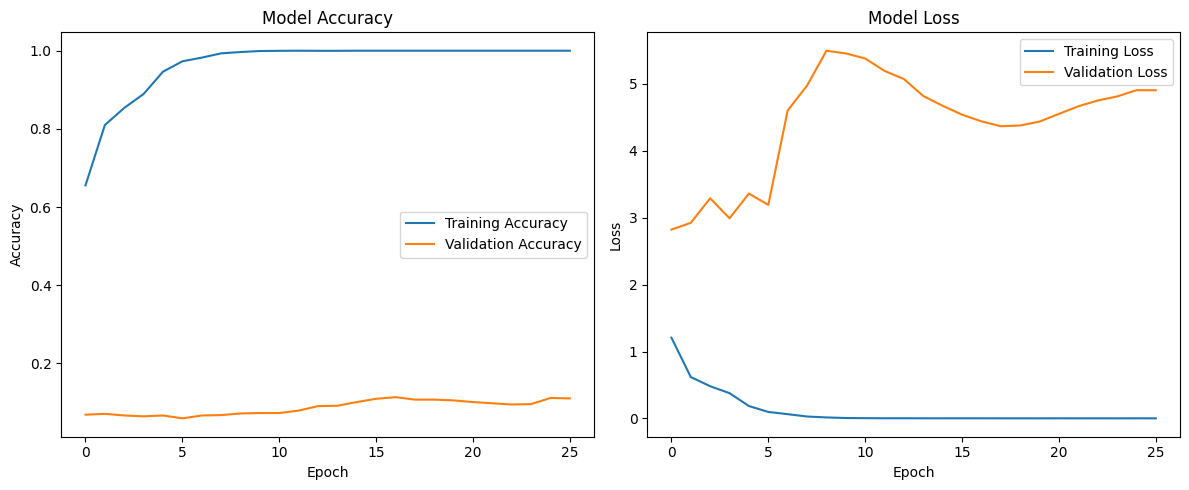

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [22]:
test_loss, test_acc = model2.evaluate(test_generator)

print(f"Test Accuracy: {test_acc:.4f}")


38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - accuracy: 0.1158 - loss: 4.4667
Test Accuracy: 0.1142


In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict on the test set using the trained model
y_pred_probs = model2.predict(test_generator, verbose=1)

# Get the class with the highest probability (convert probabilities to class labels)
y_pred = np.argmax(y_pred_probs, axis=1)

# Get the true labels from the test generator
y_true = test_generator.classes

# Print the classification report, which includes precision, recall, and F1-score for each class
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Optional: Print the confusion matrix to further analyze the predictions
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 195ms/step
                                precision    recall  f1-score   support

      Astrocitoma T1_augmented       0.04      0.03      0.03        80
        Carcinoma T1_augmented       0.00      0.00      0.00        80
       Ependimoma T1_augmented       0.21      0.04      0.06        80
    Ganglioglioma T1_augmented       1.00      0.05      0.10        80
        Germinoma T1_augmented       0.00      0.00      0.00        80
     Glioblastoma T1_augmented       0.00      0.00      0.00        80
        Granuloma T1_augmented       0.00      0.00      0.00        80
   Meduloblastoma T1_augmented       0.16      0.25      0.20        80
       Meningioma T1_augmented       0.11      0.82      0.19        80
      Neurocitoma T1_augmented       0.00      0.00      0.00        80
Oligodendroglioma T1_augmented       0.11      0.53      0.19        80
         Papiloma T1_augmented       0.00      0.00      0.00        80
       Schwannoma T1_

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
